In [3]:
#Basic and most important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import Counter
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly

#Classifiers
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

#Model Evaluation tools
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

import warnings
warnings.filterwarnings("ignore")
from PIL import Image

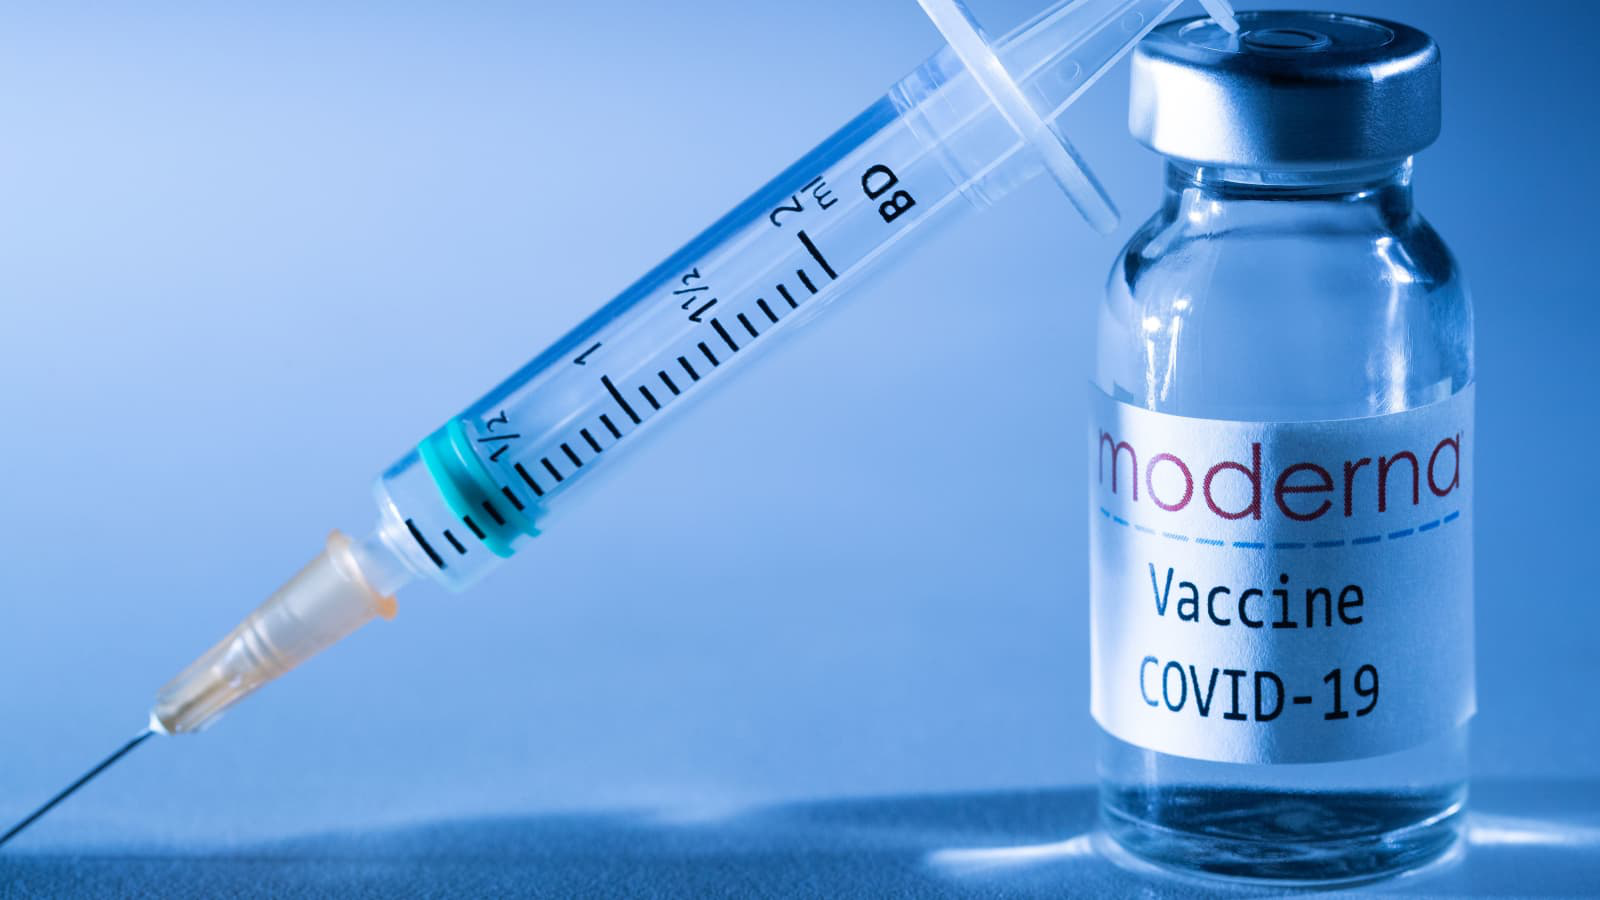

In [4]:
Image.open("vaccine.jpeg")

Vaccines are a cornerstone of modern medicine, playing a pivotal role in safeguarding public health and preventing the spread of infectious diseases. These biological agents, typically composed of weakened or inactivated pathogens or their components, stimulate the immune system to recognize and defend against specific infections. Vaccines have been instrumental in eradicating or controlling once-devastating diseases such as polio, smallpox, and measles. Beyond individual protection, widespread vaccination contributes to the concept of herd immunity, indirectly shielding vulnerable populations who may be unable to receive vaccines. The development and deployment of vaccines involve rigorous scientific research, testing, and regulatory processes to ensure safety and efficacy. In the face of emerging health threats, vaccines serve as powerful tools to mitigate the impact of infectious diseases, enhance global health security, and foster resilient communities. Public awareness, education, and equitable access to vaccines are crucial components of successful vaccination campaigns, promoting a collective effort to build immunity and protect the well-being of communities worldwide.

In [5]:
#default theme
sns.set_theme(palette='tab10',
             font='Lucida Calligraphy',
             font_scale=1.0,
             style='darkgrid')
import matplotlib
matplotlib.rcParams.update({'font.size':10})
plt.style.use('bmh')

In [6]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [7]:
df.sample(10).style.background_gradient(cmap='coolwarm')

In [8]:
df.shape

(26707, 34)

In [9]:
df=df.drop(['unique_id'],axis=1)

In [10]:
df.describe().style.background_gradient(cmap='rainbow')

In [11]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
marital_status                object
h

In [12]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [13]:
categorical_columns=['h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa','no_of_adults','no_of_children']

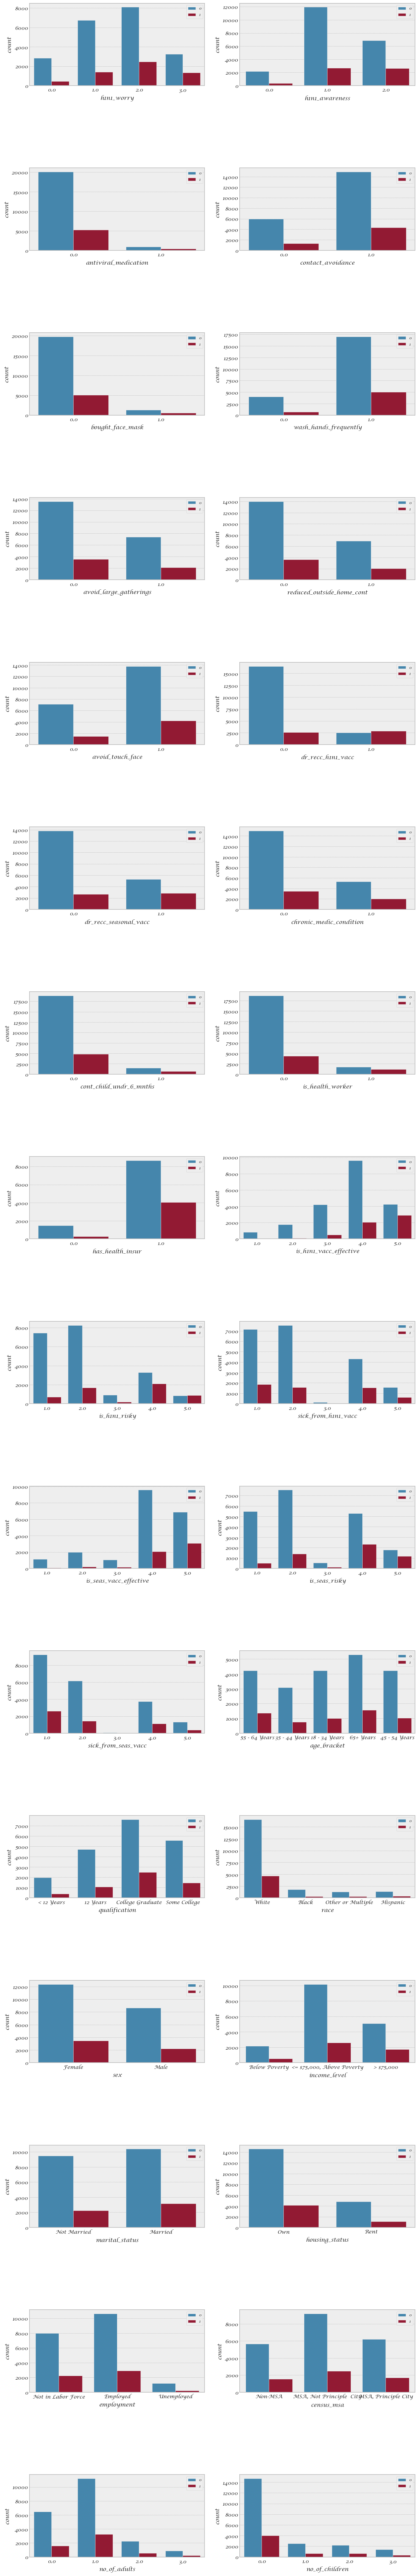

In [14]:
fig, axes=plt.subplots(16,2,figsize=(15,100))

for idx, cat_col in enumerate(categorical_columns):
    row, col=idx//2, idx%2
    sns.countplot(x=cat_col, data=df, hue='h1n1_vaccine', ax=axes[row, col])
    axes[row, col].legend(fontsize='small') #set the fontsize for the legend
    
plt.subplots_adjust(hspace=1)
plt.show()

In [15]:
correlation_mat=df.corr(numeric_only=True)

<Axes: >

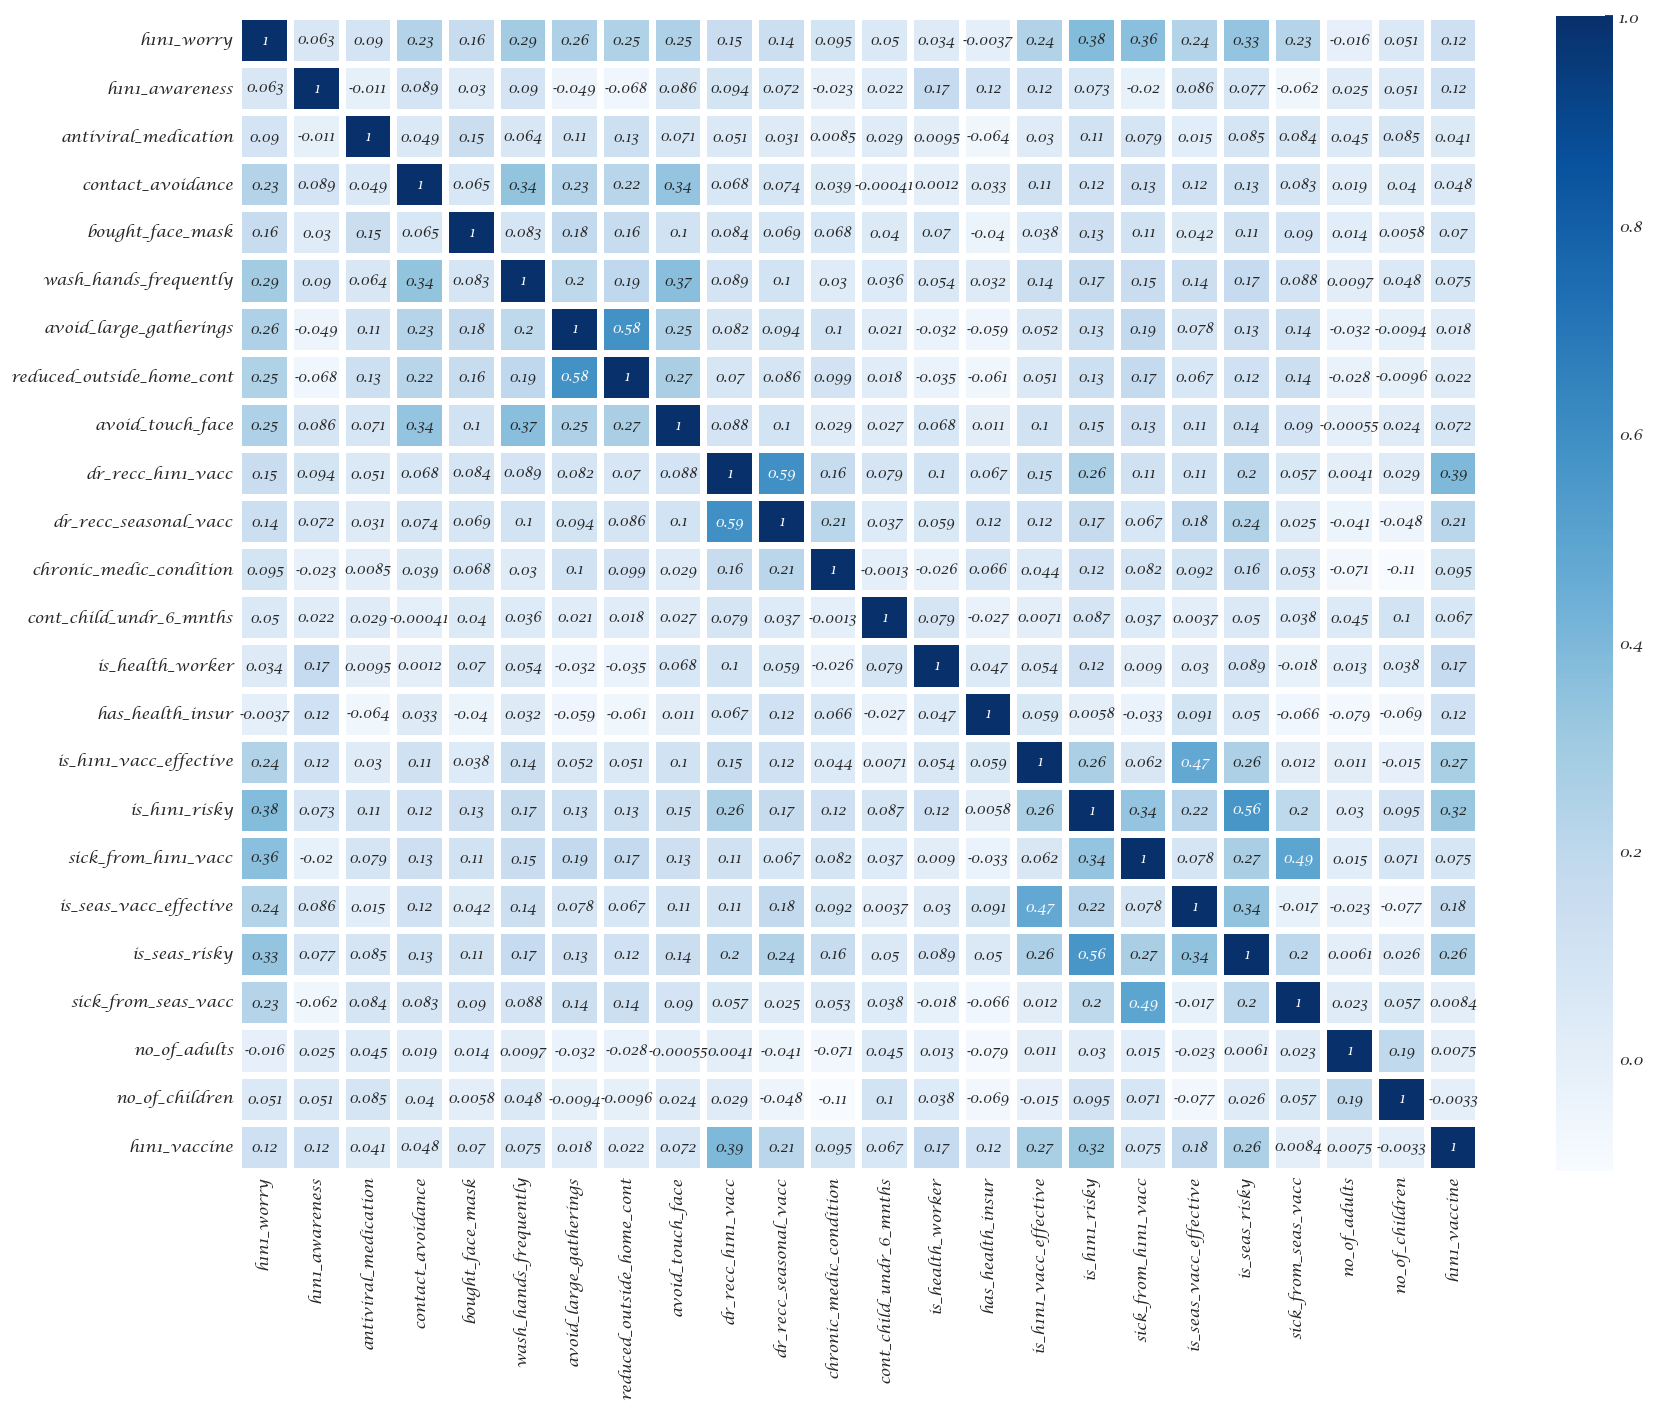

In [16]:
fig, axes=plt.subplots(figsize=(20,15))
sns.heatmap(correlation_mat,linewidths=5,cmap="Blues",ax=axes,annot=True)

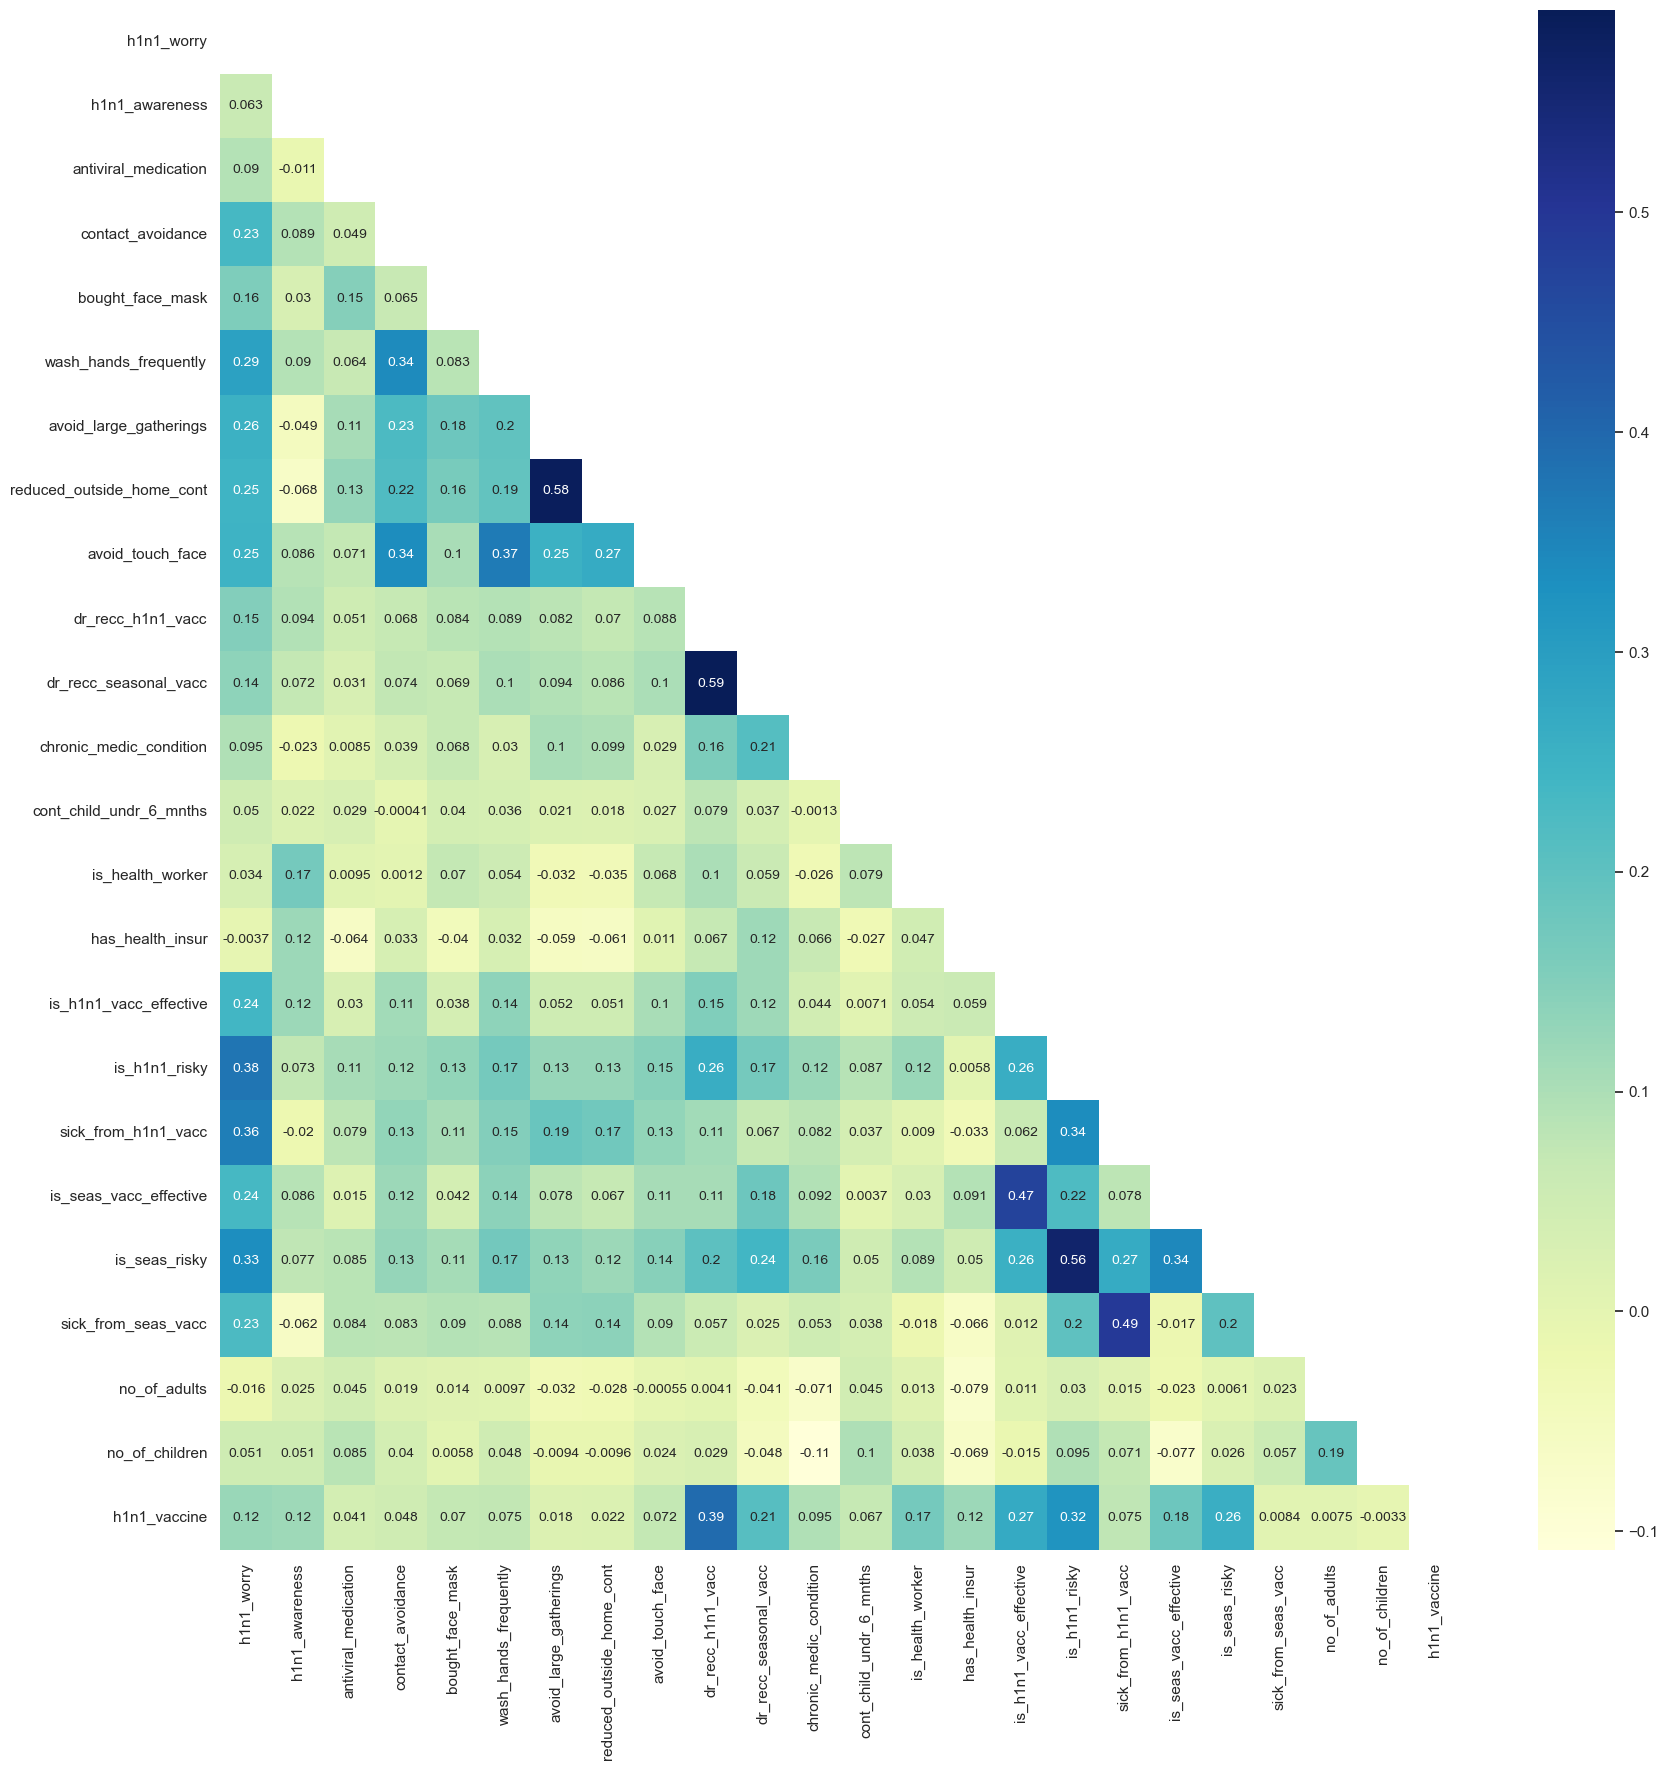

In [17]:
mask=np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)]=True
with sns.axes_style("white"):
    f,ax=plt.subplots(figsize=(20,20))
    ax=sns.heatmap(correlation_mat,mask=mask,annot=True,cmap="YlGnBu")

In [18]:
df1=df[['h1n1_vaccine','age_bracket','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa','no_of_adults','no_of_children']]

In [19]:
df2=df[['h1n1_vaccine','is_h1n1_vacc_effective','is_h1n1_risky','sick_from_h1n1_vacc','is_seas_vacc_effective','is_seas_risky','sick_from_seas_vacc','chronic_medic_condition','cont_child_undr_6_mnths','is_health_worker','has_health_insur']]

In [20]:
df3=df[['h1n1_vaccine','h1n1_worry','h1n1_awareness','antiviral_medication','contact_avoidance','bought_face_mask','wash_hands_frequently','avoid_large_gatherings','reduced_outside_home_cont','avoid_touch_face','dr_recc_h1n1_vacc','dr_recc_seasonal_vacc']]

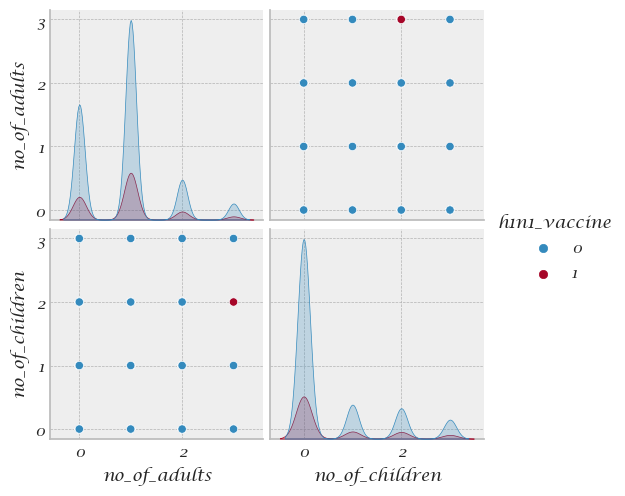

In [21]:
sns.pairplot(df1,hue="h1n1_vaccine")

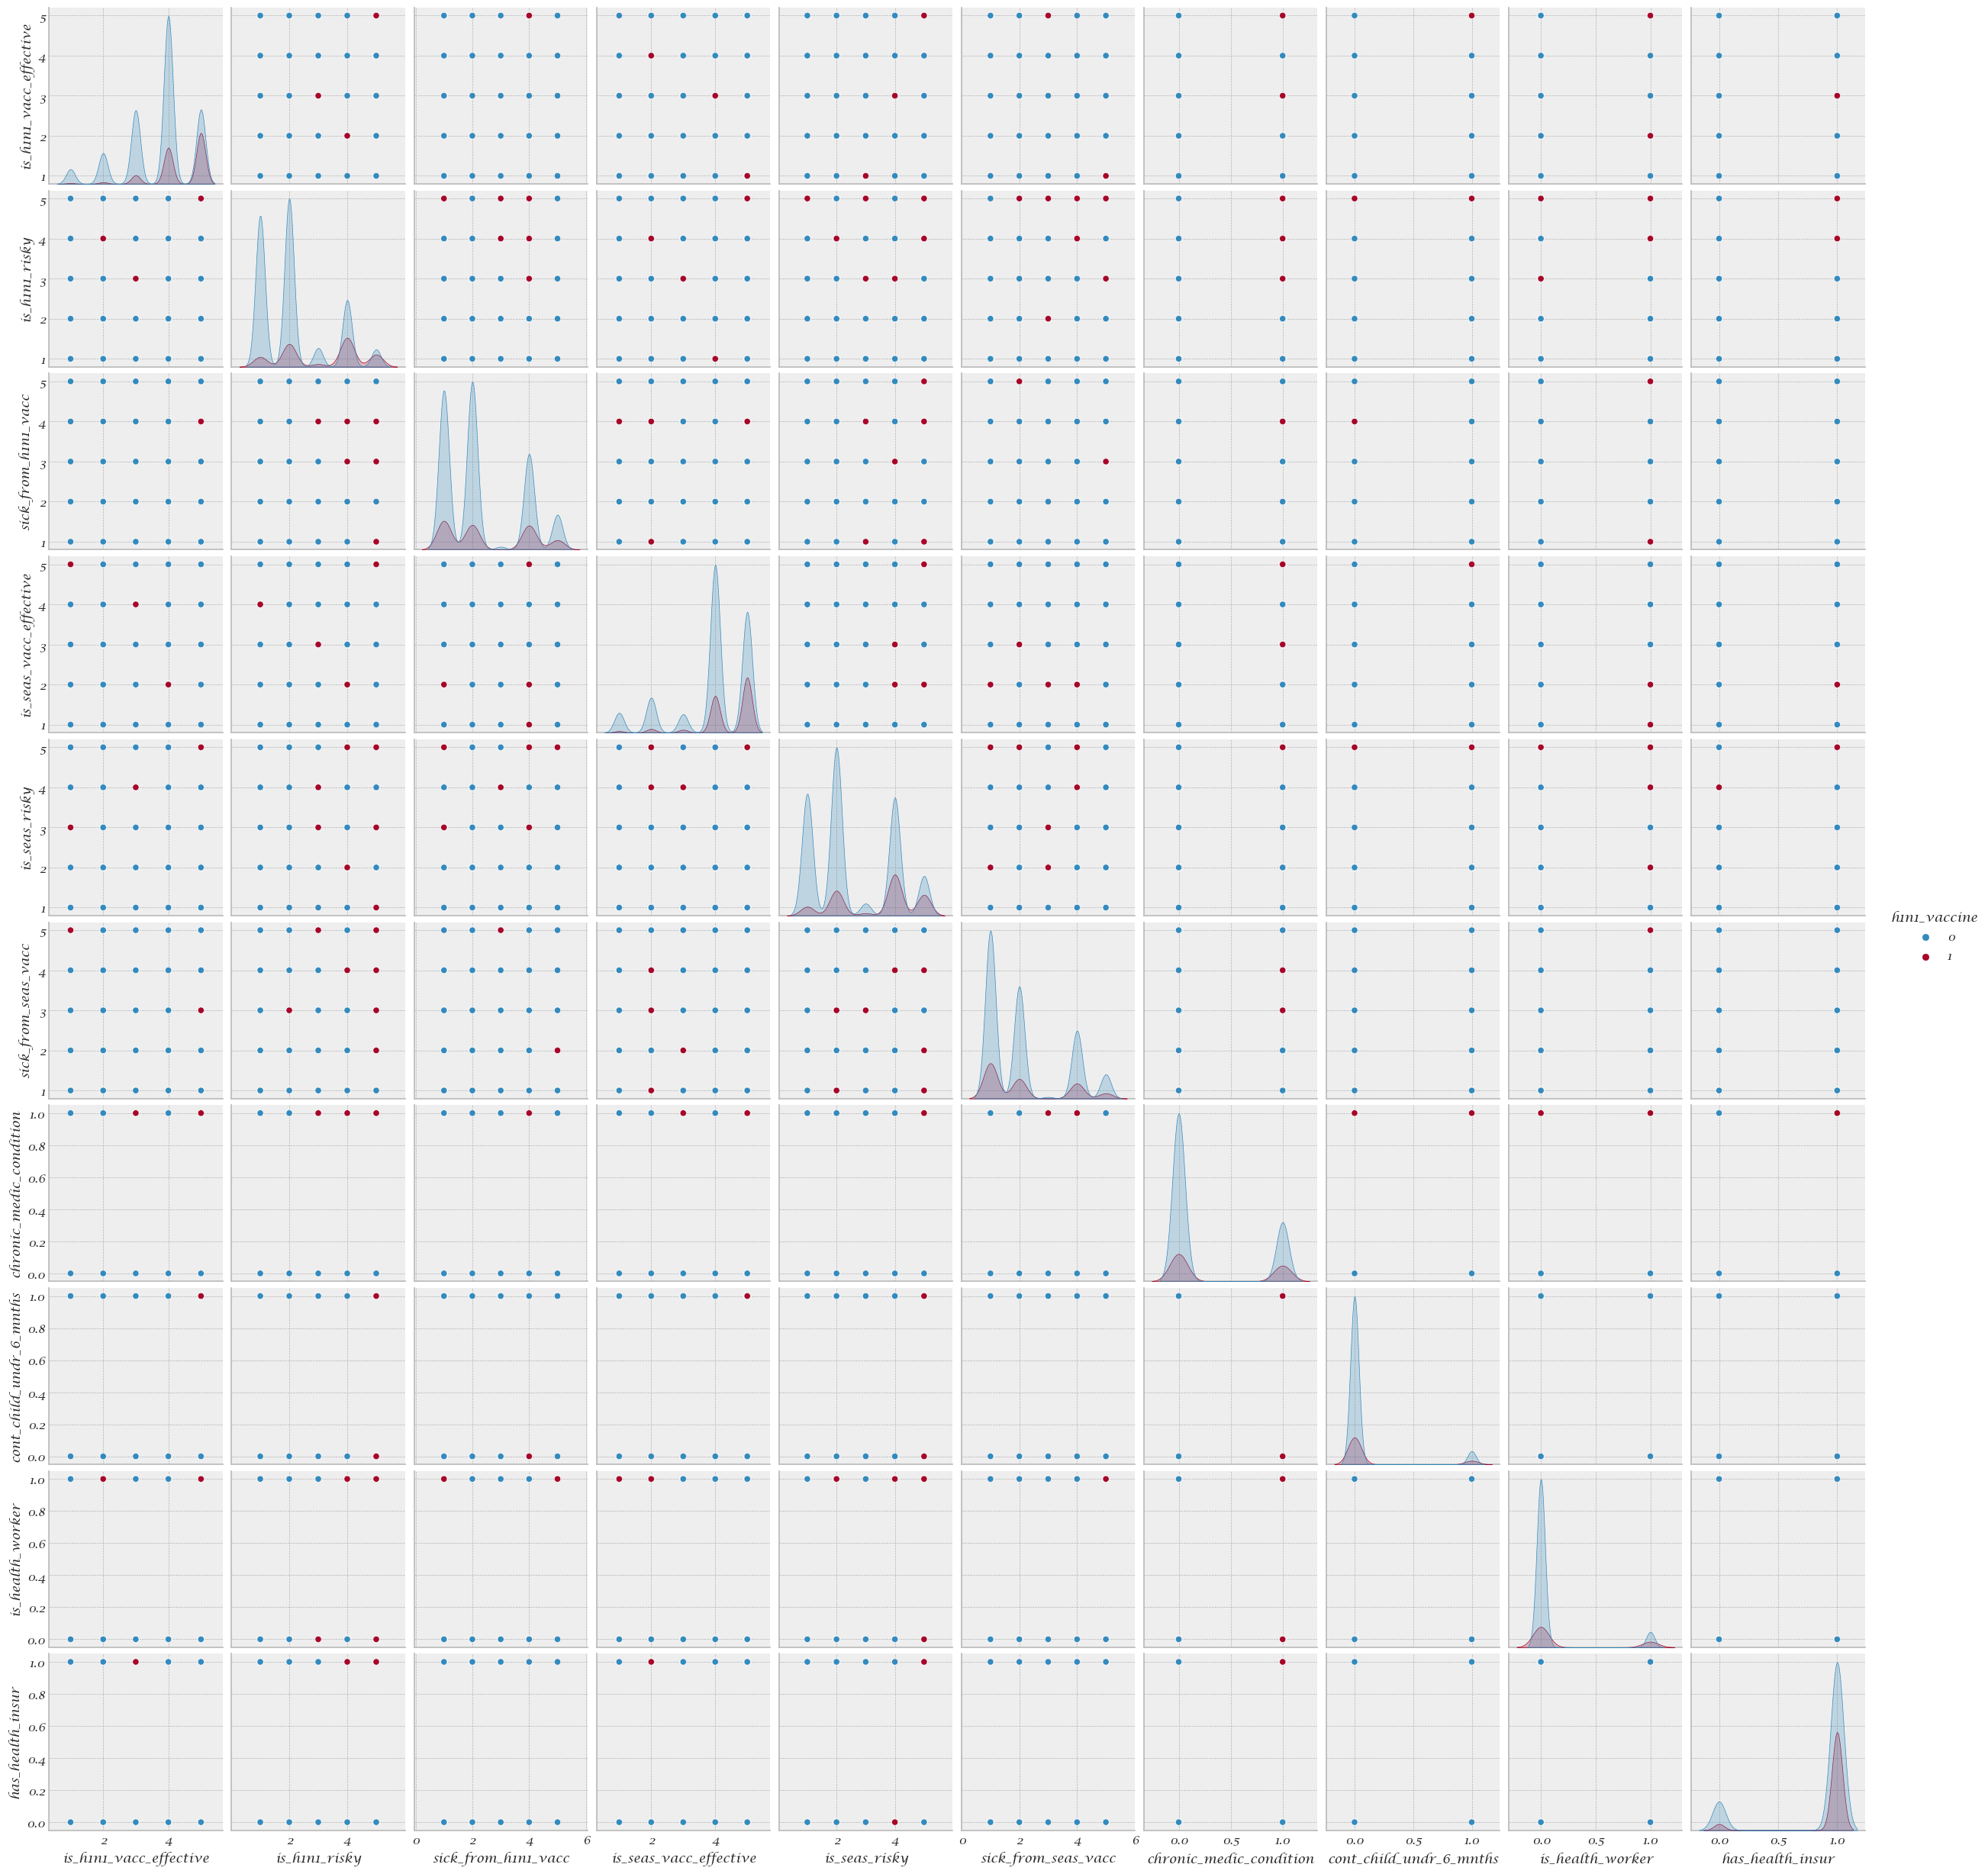

In [22]:
sns.pairplot(df2,hue="h1n1_vaccine")

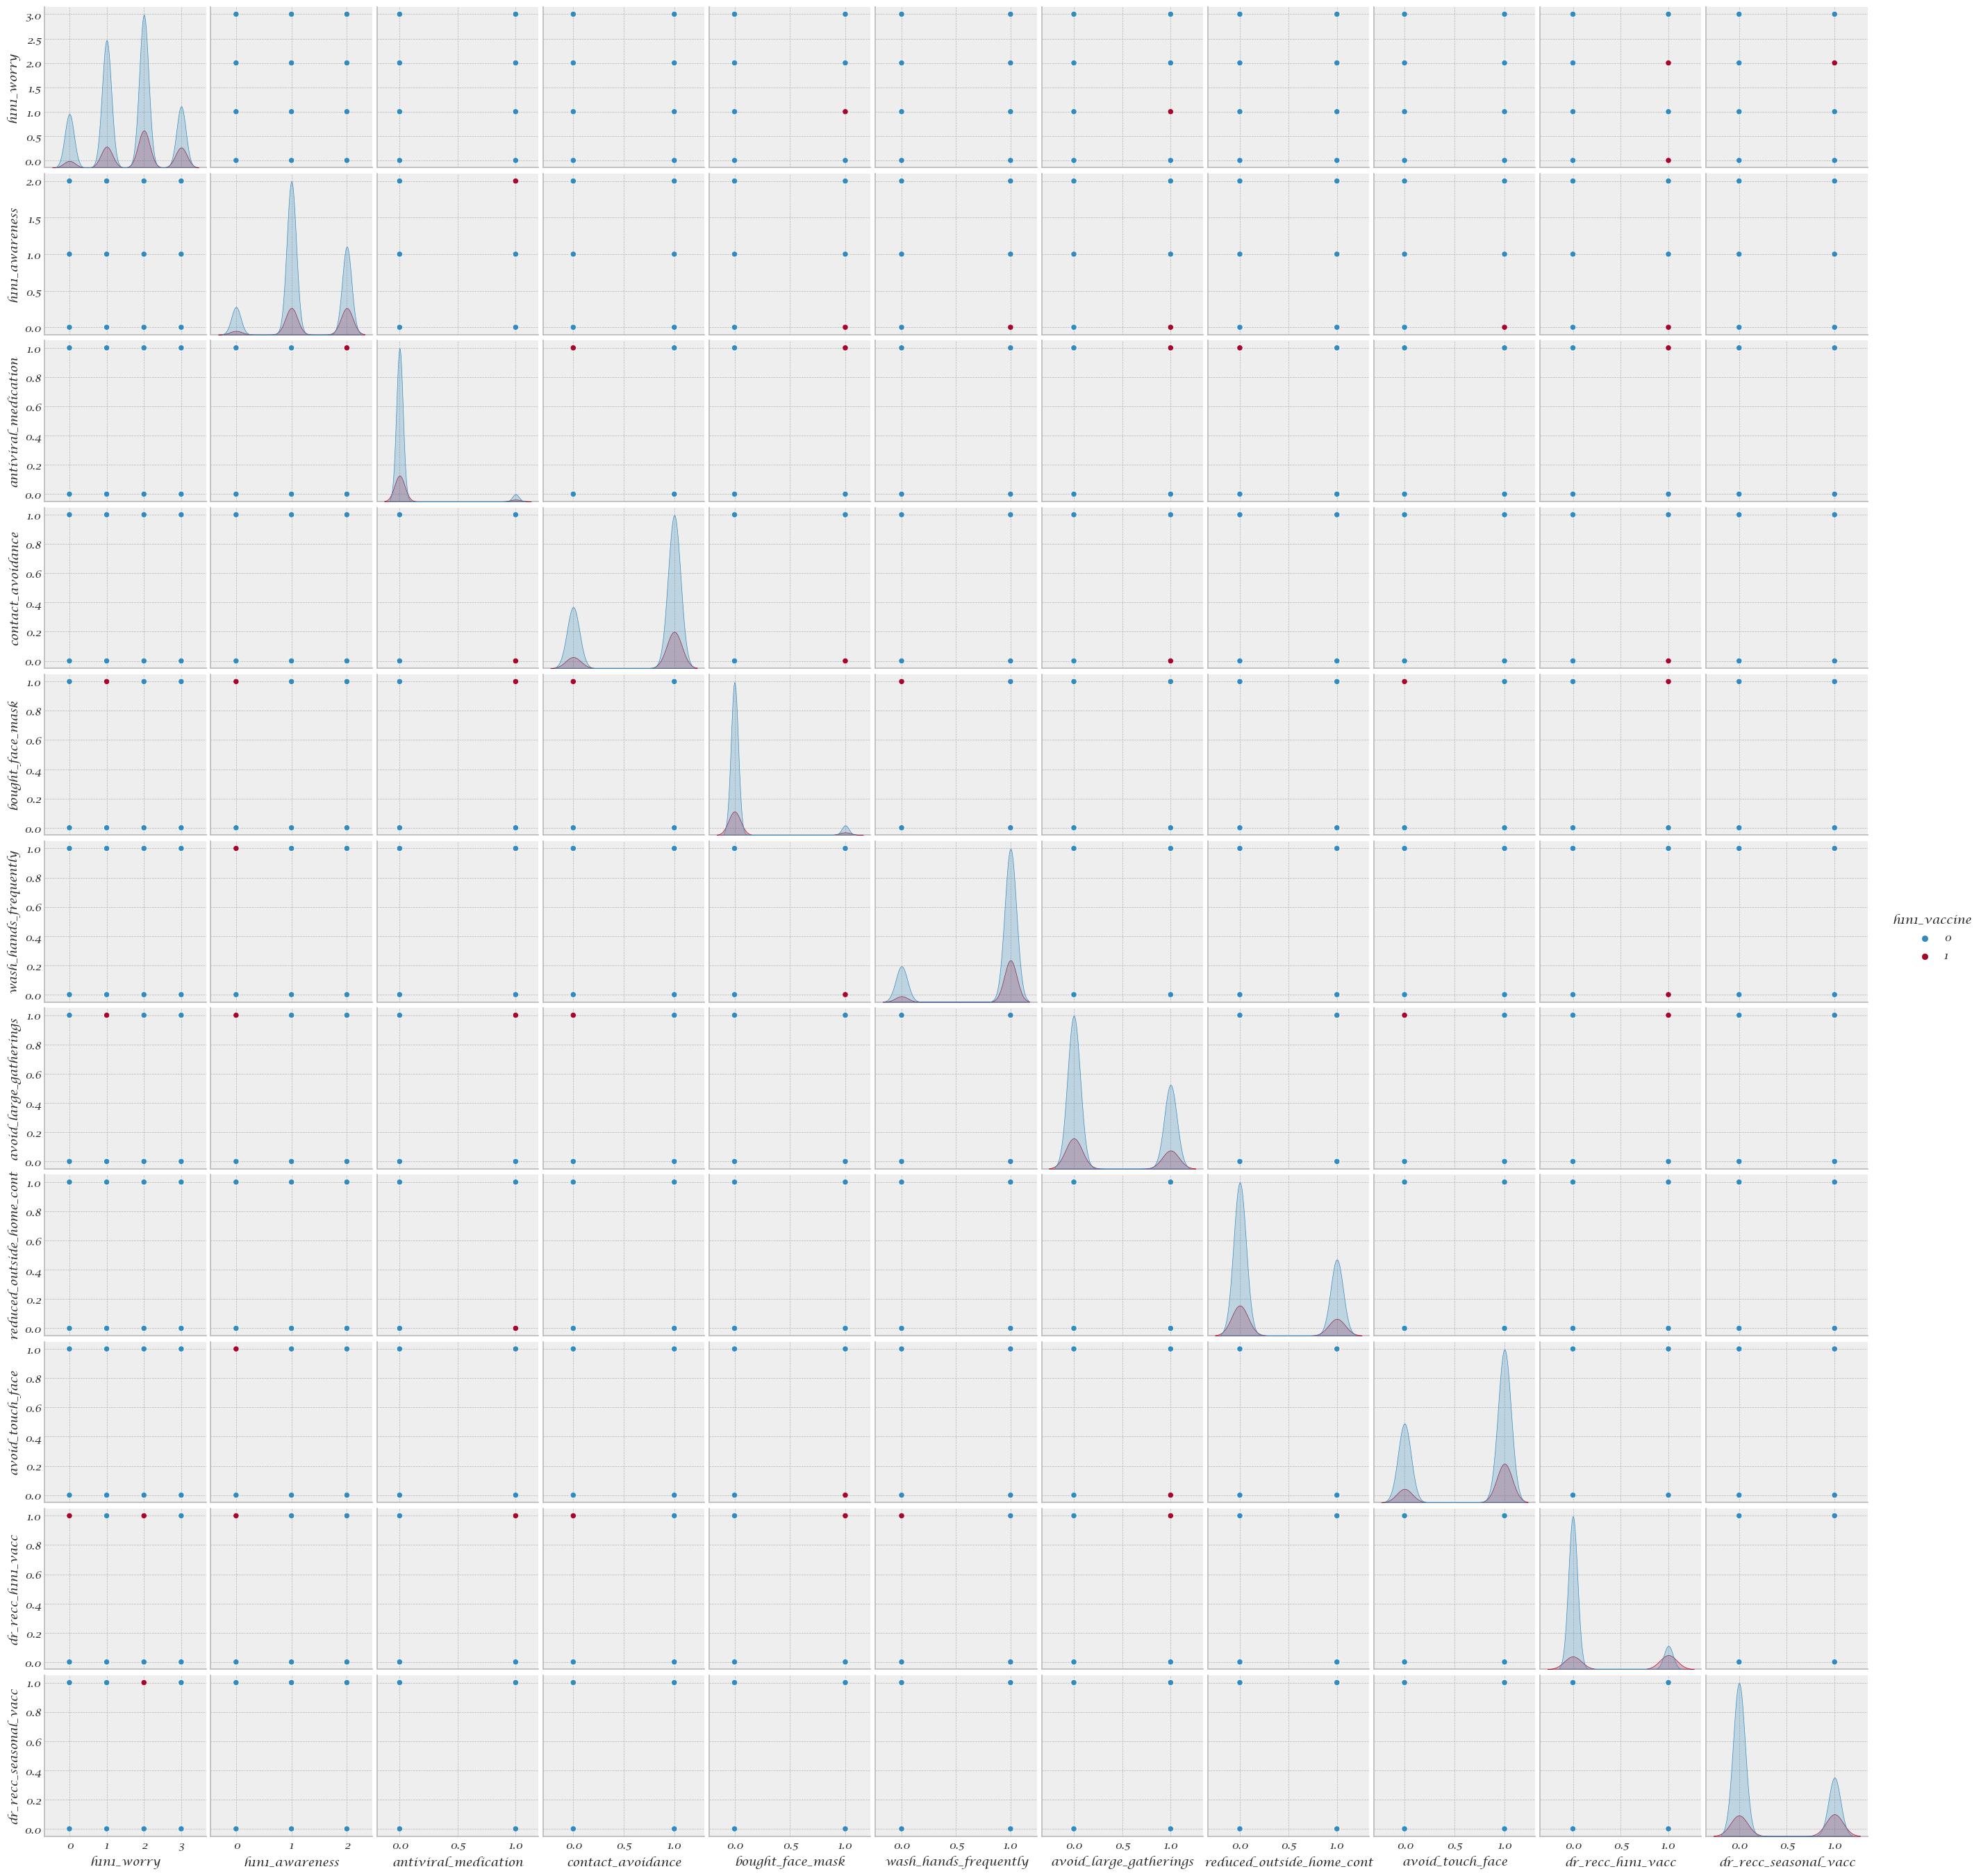

In [23]:
sns.pairplot(df3,hue="h1n1_vaccine")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [25]:
#counting of columnns unique values

print(df["h1n1_worry"].value_counts())
print(df["h1n1_awareness"].value_counts())
print(df["antiviral_medication"].value_counts())
print(df["contact_avoidance"].value_counts())
print(df["bought_face_mask"].value_counts())
print(df["wash_hands_frequently"].value_counts())
print(df["avoid_large_gatherings"].value_counts())
print(df["reduced_outside_home_cont"].value_counts())
print(df["avoid_touch_face"].value_counts())
print(df["dr_recc_h1n1_vacc"].value_counts())
print(df["dr_recc_seasonal_vacc"].value_counts())
print(df["chronic_medic_condition"].value_counts())
print(df["cont_child_undr_6_mnths"].value_counts())
print(df["is_health_worker"].value_counts())
print(df["has_health_insur"].value_counts())
print(df["is_h1n1_vacc_effective"].value_counts())
print(df["is_seas_risky"].value_counts())
print(df["sick_from_seas_vacc"].value_counts())
print(df["age_bracket"].value_counts())
print(df["qualification"].value_counts())
print(df["race"].value_counts())
print(df["sex"].value_counts())
print(df["income_level"].value_counts())
print(df["marital_status"].value_counts())
print(df["housing_status"].value_counts())
print(df["census_msa"].value_counts())
print(df["no_of_adults"].value_counts())
print(df["no_of_children"].value_counts())


h1n1_worry
2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64
h1n1_awareness
1.0    14598
2.0     9487
0.0     2506
Name: count, dtype: int64
antiviral_medication
0.0    25335
1.0     1301
Name: count, dtype: int64
contact_avoidance
1.0    19228
0.0     7271
Name: count, dtype: int64
bought_face_mask
0.0    24847
1.0     1841
Name: count, dtype: int64
wash_hands_frequently
1.0    22015
0.0     4650
Name: count, dtype: int64
avoid_large_gatherings
0.0    17073
1.0     9547
Name: count, dtype: int64
reduced_outside_home_cont
0.0    17644
1.0     8981
Name: count, dtype: int64
avoid_touch_face
1.0    18001
0.0     8578
Name: count, dtype: int64
dr_recc_h1n1_vacc
0.0    19139
1.0     5408
Name: count, dtype: int64
dr_recc_seasonal_vacc
0.0    16453
1.0     8094
Name: count, dtype: int64
chronic_medic_condition
0.0    18446
1.0     7290
Name: count, dtype: int64
cont_child_undr_6_mnths
0.0    23749
1.0     2138
Name: count, dtype: int64
is_health_worker
0.0    230

In [26]:
df.shape

(26707, 33)

In [27]:
df.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

<Axes: >

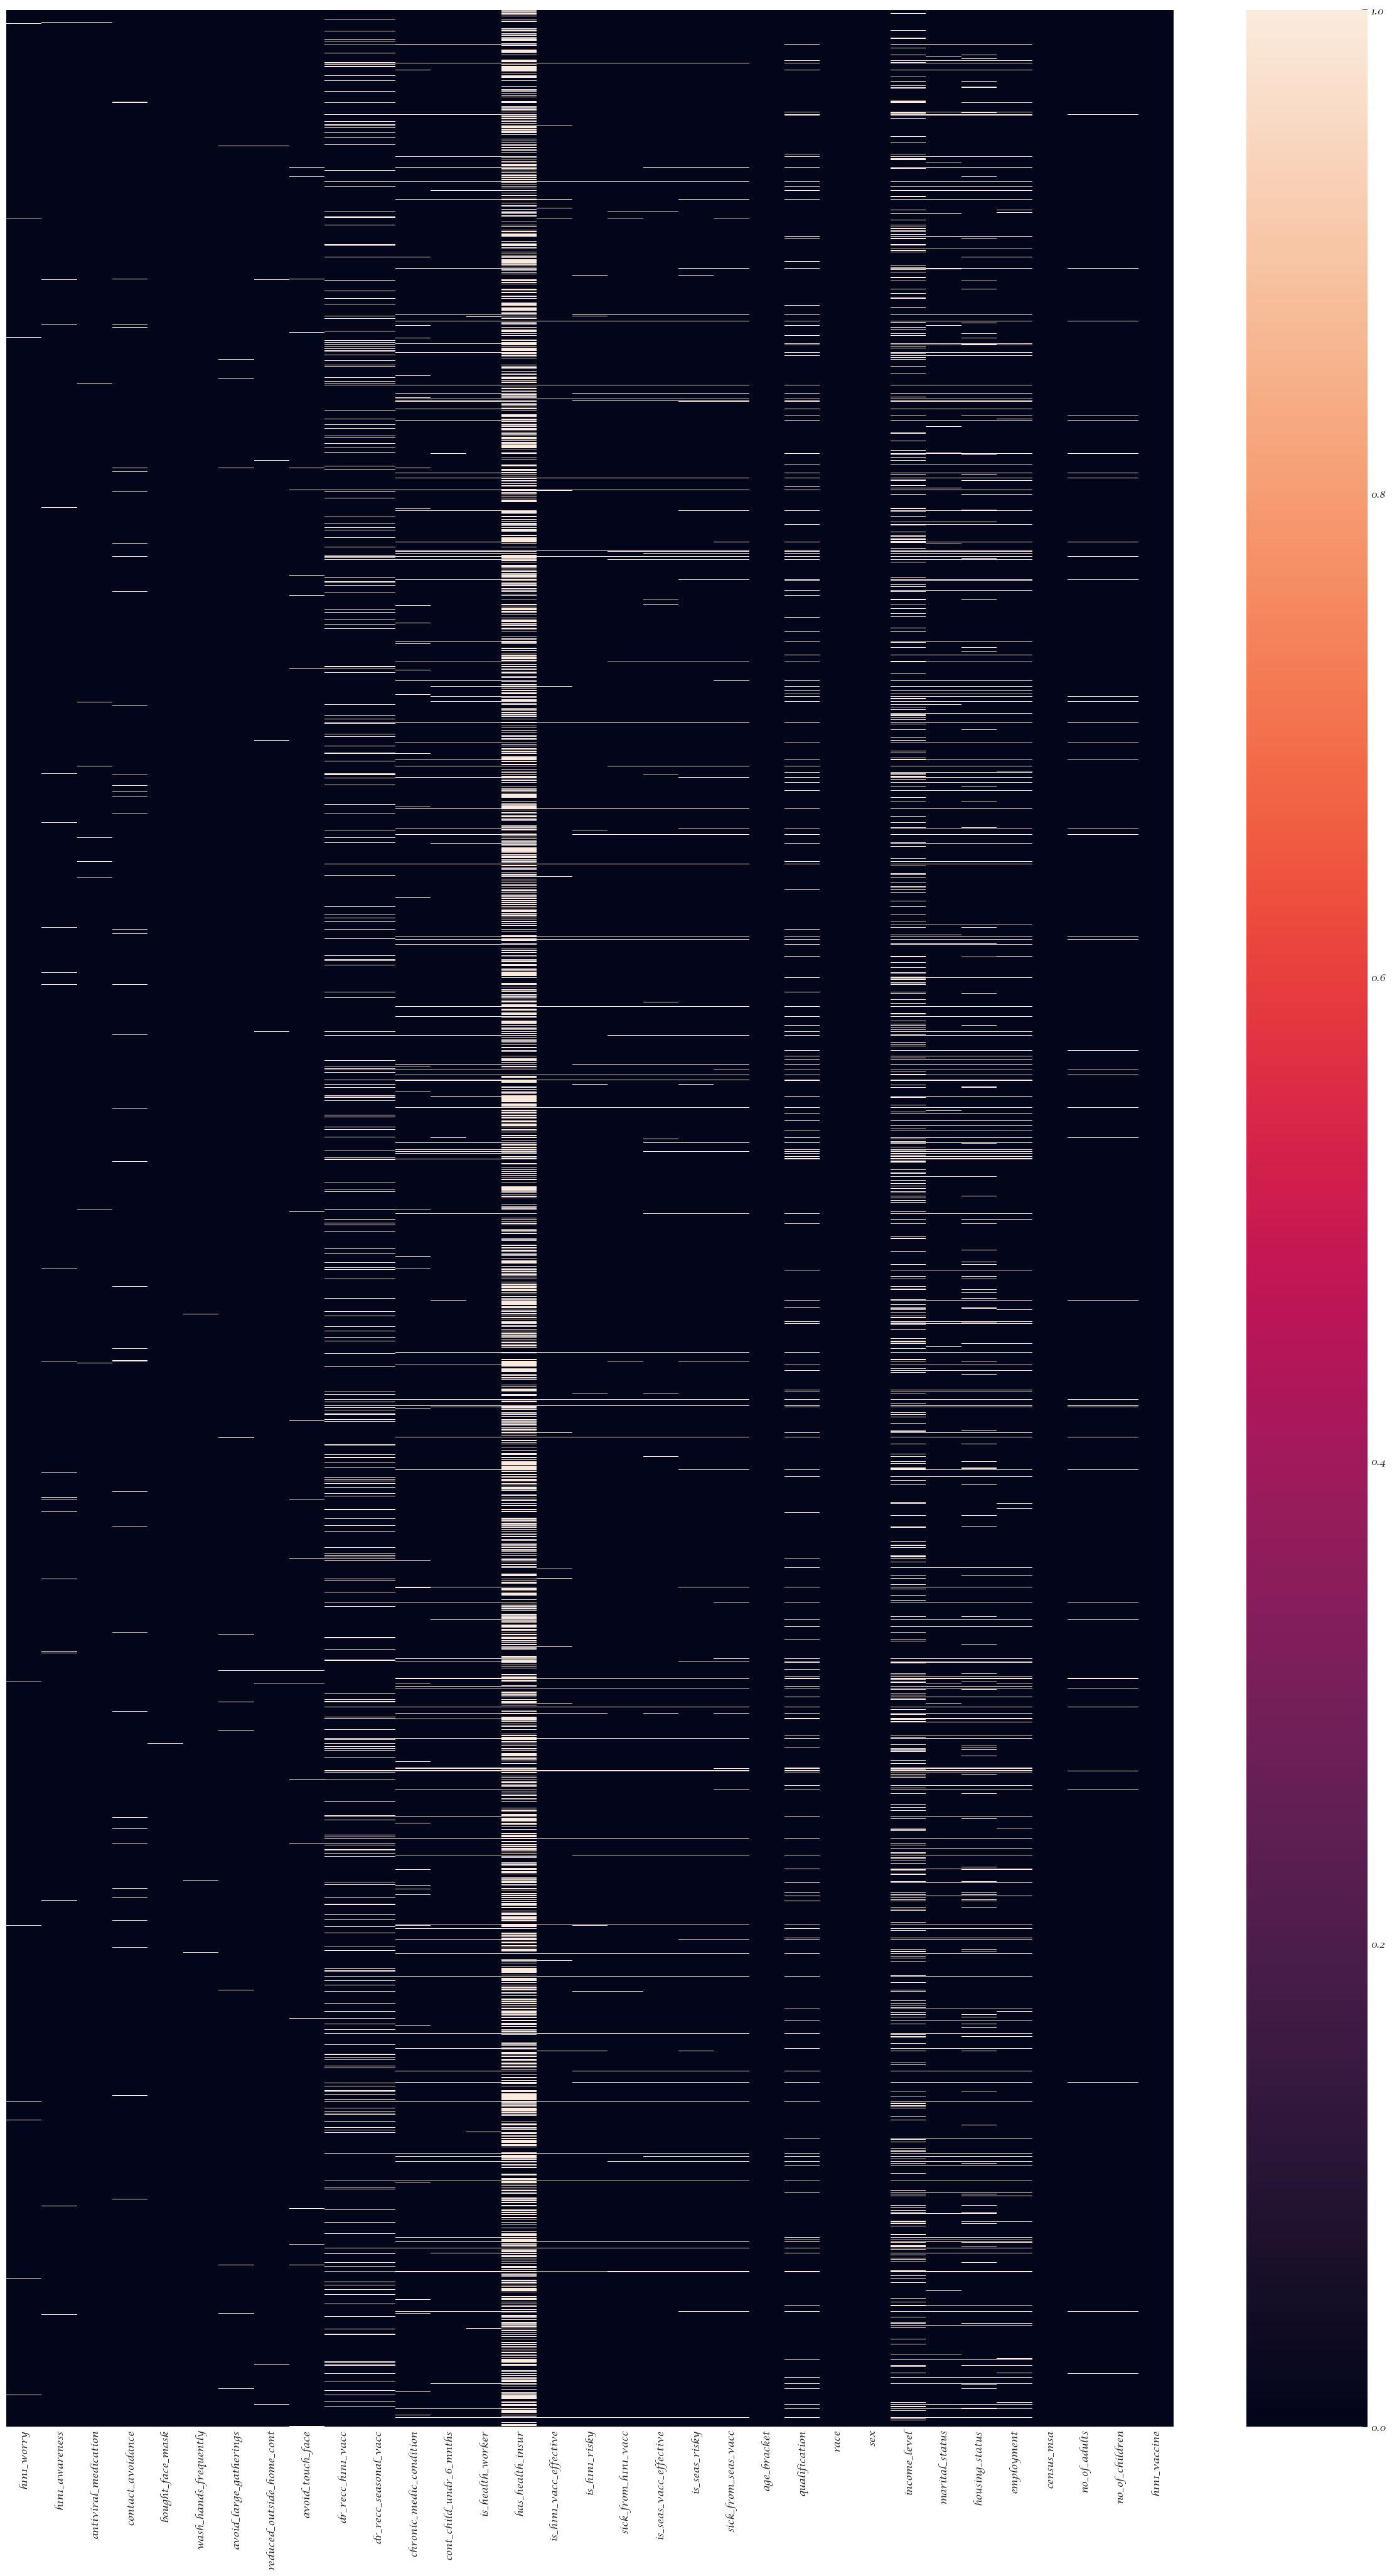

In [28]:
plt.figure(figsize=(30,50))
sns.heatmap(df.isnull(),yticklabels=False)

In [29]:
#Filling all Nan values with mode of respactive variable
df["h1n1_worry"].fillna(df["h1n1_worry"].mode()[0],inplace=True)
df["h1n1_awareness"].fillna(df["h1n1_awareness"].mode()[0],inplace=True)
df["antiviral_medication"].fillna(df["antiviral_medication"].mode()[0],inplace=True)
df["contact_avoidance"].fillna(df["contact_avoidance"].mode()[0],inplace=True)
df["bought_face_mask"].fillna(df["bought_face_mask"].mode()[0],inplace=True)
df["wash_hands_frequently"].fillna(df["wash_hands_frequently"].mode()[0],inplace=True)
df["avoid_large_gatherings"].fillna(df["avoid_large_gatherings"].mode()[0],inplace=True)
df["reduced_outside_home_cont"].fillna(df["reduced_outside_home_cont"].mode()[0],inplace=True)
df["avoid_touch_face"].fillna(df["avoid_touch_face"].mode()[0],inplace=True)
df["dr_recc_h1n1_vacc"].fillna(df["dr_recc_h1n1_vacc"].mode()[0],inplace=True)
df["dr_recc_seasonal_vacc"].fillna(df["dr_recc_seasonal_vacc"].mode()[0],inplace=True)
df["chronic_medic_condition"].fillna(df["chronic_medic_condition"].mode()[0],inplace=True)
df["cont_child_undr_6_mnths"].fillna(df["cont_child_undr_6_mnths"].mode()[0],inplace=True)
df["is_health_worker"].fillna(df["is_health_worker"].mode()[0],inplace=True)
df["has_health_insur"].fillna(df["has_health_insur"].mode()[0],inplace=True)
df["is_h1n1_vacc_effective"].fillna(df["is_h1n1_vacc_effective"].mode()[0],inplace=True)
df["is_h1n1_risky"].fillna(df["is_h1n1_risky"].mode()[0],inplace=True)
df["sick_from_h1n1_vacc"].fillna(df["sick_from_h1n1_vacc"].mode()[0],inplace=True)
df["is_seas_vacc_effective"].fillna(df["is_seas_vacc_effective"].mode()[0],inplace=True)
df["sick_from_seas_vacc"].fillna(df["sick_from_seas_vacc"].mode()[0],inplace=True)
df["income_level"].fillna(df["income_level"].mode()[0],inplace=True)
df["qualification"].fillna(df["qualification"].mode()[0],inplace=True)
df["marital_status"].fillna(df["marital_status"].mode()[0],inplace=True)
df["housing_status"].fillna(df["housing_status"].mode()[0],inplace=True)
df["employment"].fillna(df["employment"].mode()[0],inplace=True)
df["no_of_adults"].fillna(df["no_of_adults"].mode()[0],inplace=True)
df["no_of_children"].fillna(df["no_of_children"].mode()[0],inplace=True)

In [30]:
df["is_seas_risky"].fillna(df["is_seas_risky"].mode()[0],inplace=True)

In [31]:
df.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

<Axes: >

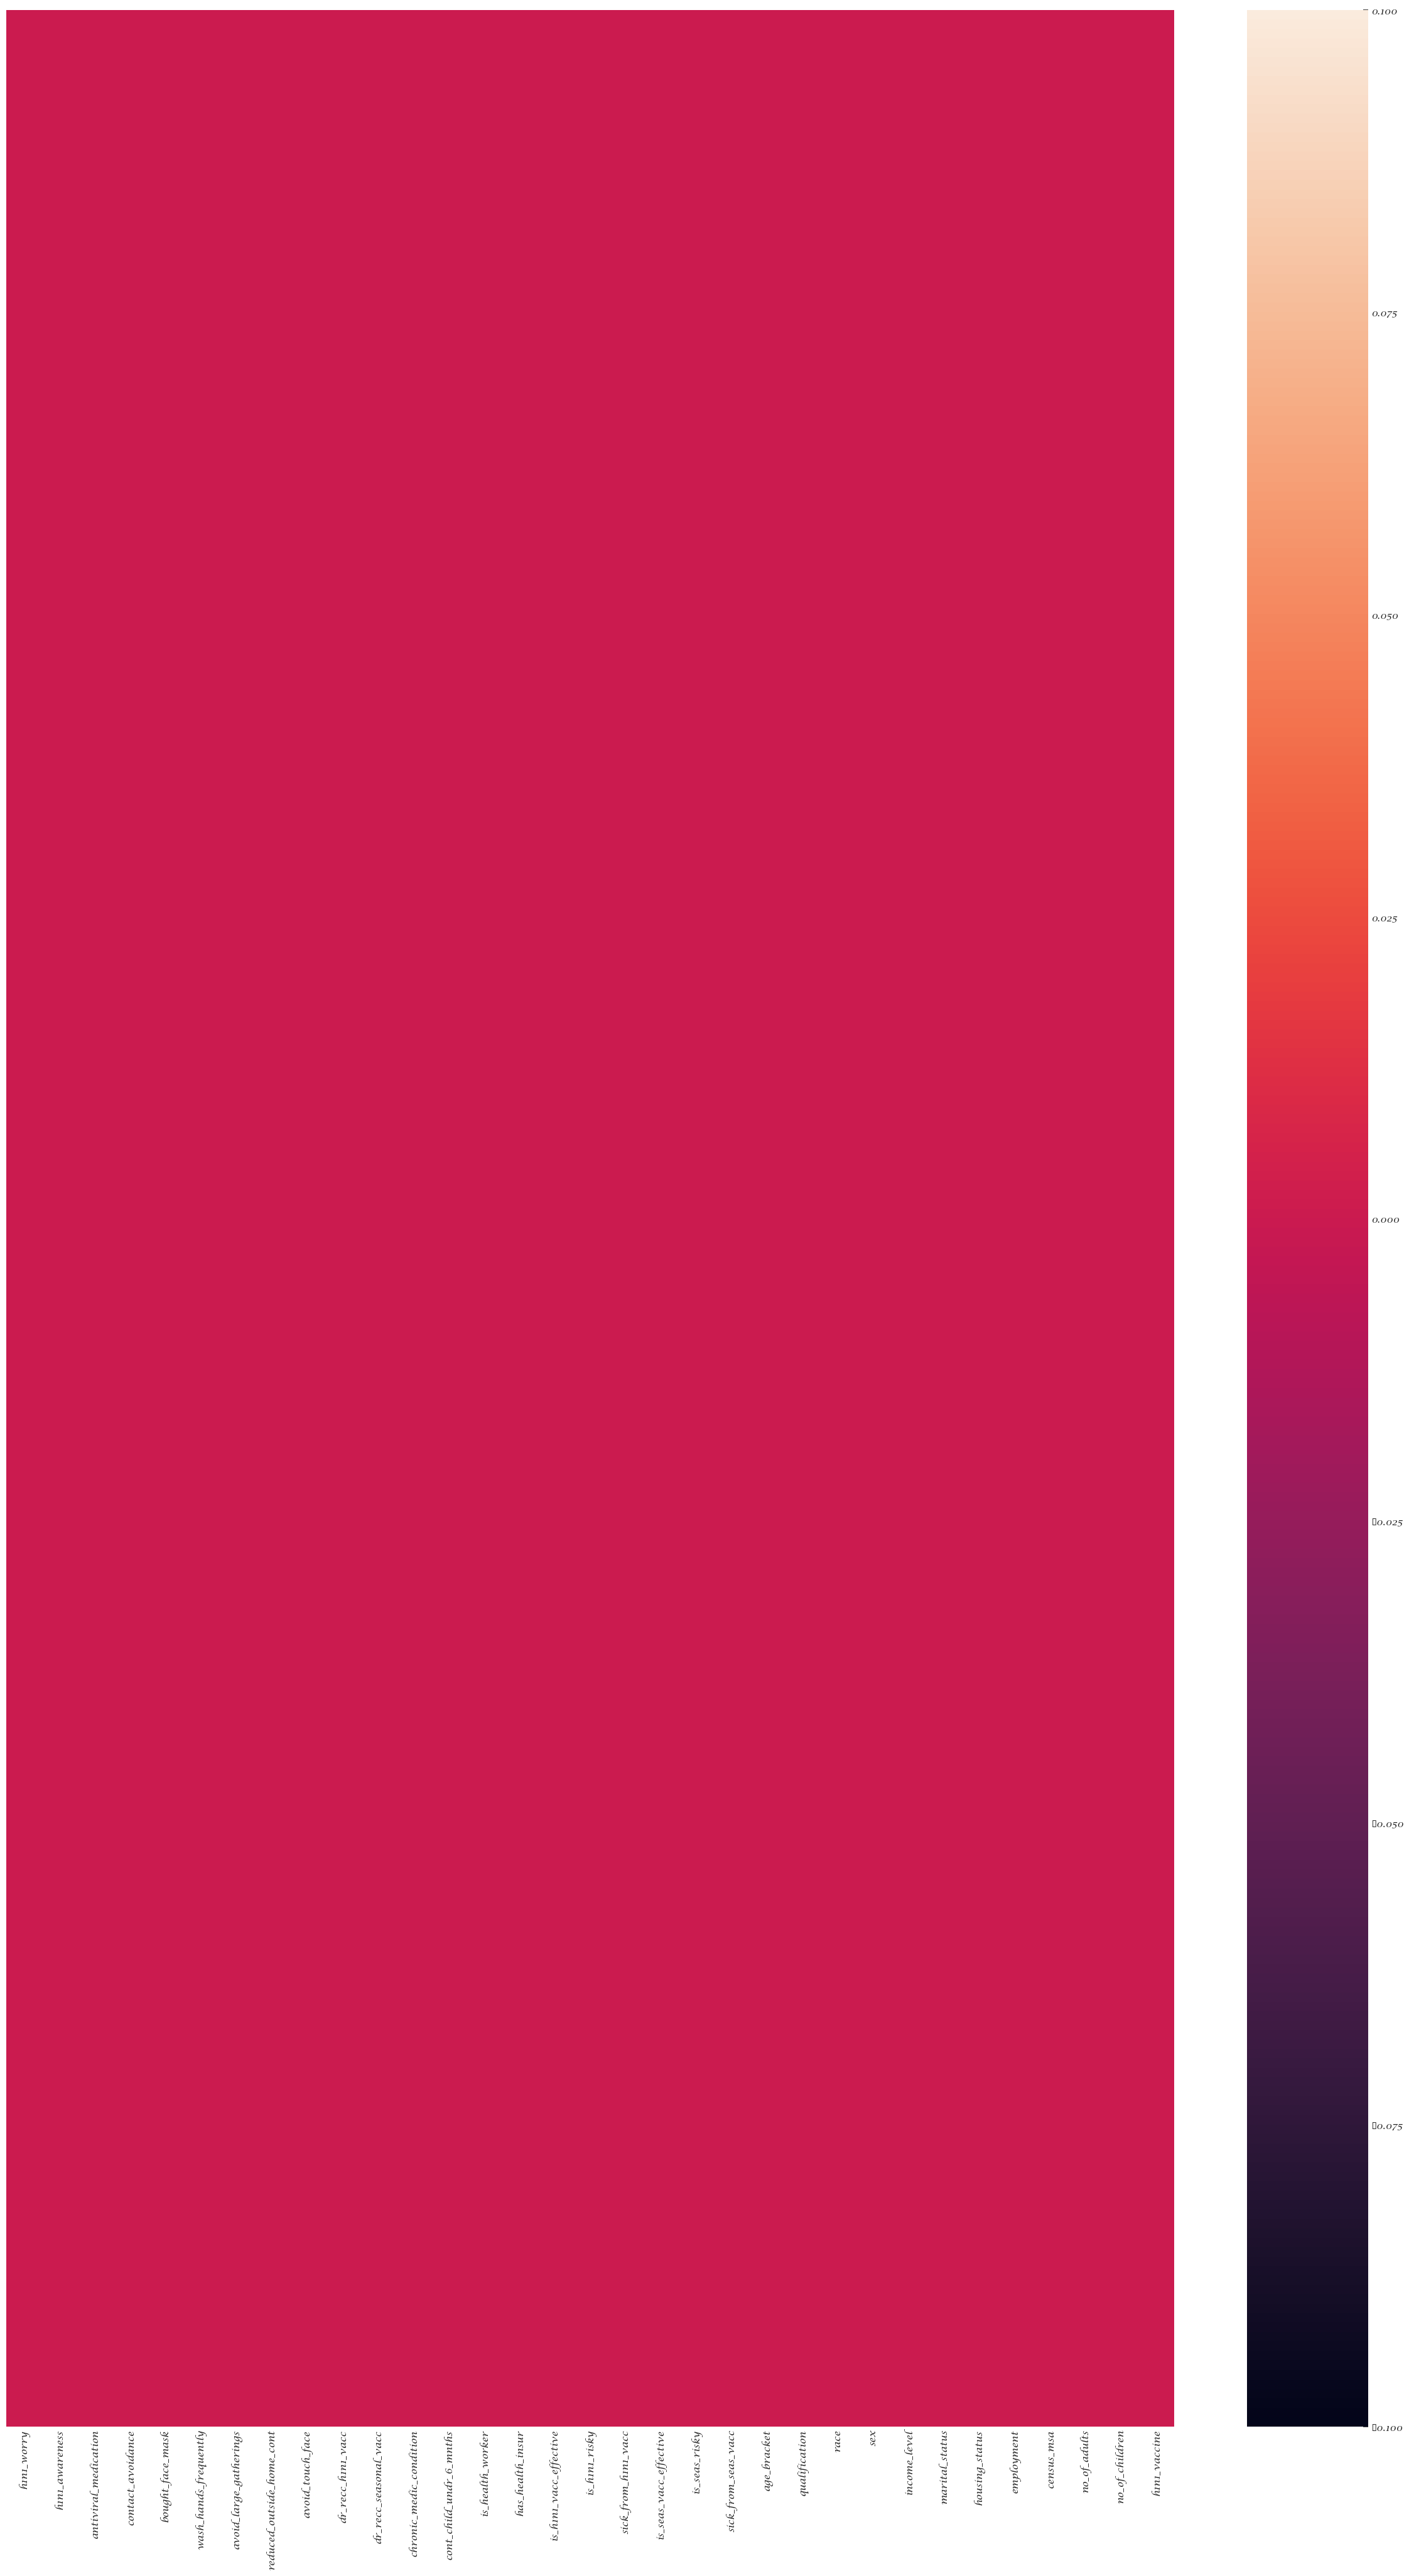

In [32]:
plt.figure(figsize=(30,50))
sns.heatmap(df.isnull(),yticklabels=False)

In [33]:
df["age_bracket"]=le.fit_transform(df["age_bracket"])
df["race"]=le.fit_transform(df["race"])
df["sex"]=le.fit_transform(df["sex"])
df["income_level"]=le.fit_transform(df["income_level"])
df["qualification"]=le.fit_transform(df["qualification"])
df["marital_status"]=le.fit_transform(df["marital_status"])
df["housing_status"]=le.fit_transform(df["housing_status"])
df["employment"]=le.fit_transform(df["employment"])
df["no_of_adults"]=le.fit_transform(df["no_of_adults"])
df["no_of_children"]=le.fit_transform(df["no_of_children"])
df["census_msa"]=le.fit_transform(df["census_msa"])

In [34]:
df.sample(10).style.background_gradient(cmap='coolwarm')

In [35]:
#Dividing data into input X variable and target y variable
x=df.drop(["h1n1_vaccine"],axis=1)
y=df["h1n1_vaccine"]

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

# Logistic Classifier

In [37]:
model_log=LogisticRegression()

In [38]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [39]:
model_log.score(x_train,y_train)

0.8334759815983738

In [40]:
model_log.score(x_test,y_test)

0.8406339697990765

# Prediction Model

In [41]:
predictions=model_log.predict(x_test)

<Axes: >

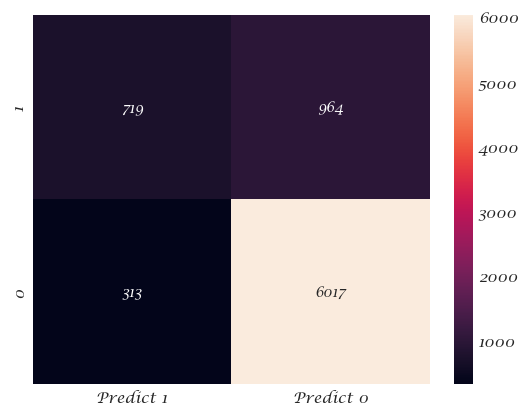

In [42]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions, labels=[1,0])
df_cm=pd.DataFrame (cm,index=[i for i in ["1","0"]],
                    columns=[i for i in["Predict 1","Predict 0"]])
sns.heatmap(df_cm,annot=True,fmt='g')

# Decision Tree Classifier

In [96]:
model_dtc=DecisionTreeClassifier(splitter='random',max_depth=4)
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, splitter='random')

In [97]:
model_dtc.score(x_train,y_train)

0.8244356478014336

In [98]:
model_dtc.score(x_test,y_test)

0.8285286409584426

# Bagging Classifier

In [106]:
m_b=BaggingClassifier(n_estimators=20,bootstrap=True)
m_b.fit(x_train,y_train)

BaggingClassifier(n_estimators=20)

In [107]:
model_dtc.score(x_train,y_train)

0.8244356478014336

In [108]:
model_dtc.score(x_test,y_test)

0.8285286409584426

# AdaBoost Classifier,Gradient Boosting Classifier and Random Forest Classifier

In [121]:
m_abc=AdaBoostClassifier()
m_gbc=GradientBoostingClassifier()
mrfc=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1,bootstrap=True,max_samples=100)

In [50]:
m_abc.fit(x_train,y_train)

AdaBoostClassifier()

In [51]:
m_abc.score(x_train,y_train)

0.8326735851075211

In [52]:
m_abc.score(x_test,y_test)

0.8423811306626732

In [53]:
m_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [54]:
m_gbc.score(x_train,y_train)

0.8418743982026319

In [55]:
m_gbc.score(x_test,y_test)

0.8452514663671534

In [122]:
mrfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_samples=100, random_state=1)

In [123]:
mrfc.score(x_train,y_train)

0.8153953140044934

In [124]:
mrfc.score(x_test,y_test)

0.8181704729814052

# Support vactor Classifier

In [59]:
m_svc=SVC()
m_svc.fit(x_train,y_train)

SVC()

In [60]:
m_svc.score(x_train,y_train)

0.8368995399593453

In [61]:
m_svc.score(x_test,y_test)

0.8378884312991389